# Spaceship Titanic (Exploratory Data Analyses)

#### Dataset Background:
The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

Original Link: https://www.kaggle.com/competitions/spaceship-titanic/overview

### Column Information
* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style("darkgrid")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import Cleaned Dataset
spacetitanic = pd.read_csv('spacetitanic.csv')

The purpose of this EDA is to investigate who got transported into an alternate dimension. Therefore, the EDA will primarily look into transported/not when pitted against the other variables. That will come into section 2.

The initial section will look into the other variables in order to get a sense of what our passengers on board were like. 

## Section 1: Visualizing Variables

### How many people were transported vs. not transported?

In [5]:
spacetitanic['Transported'].value_counts()

False    8592
True     4378
Name: Transported, dtype: int64

In [6]:
transportedMask = spacetitanic['Transported'] == True
transportedNum = len(spacetitanic[transportedMask])

notTransportedMask = spacetitanic['Transported'] == False
notTransportedNum = len(spacetitanic[notTransportedMask])

print(f"The difference between Not Transported and Transported is {notTransportedNum - transportedNum} people")

The difference between Not Transported and Transported is 4214 people


[Text(0, 0.5, '')]

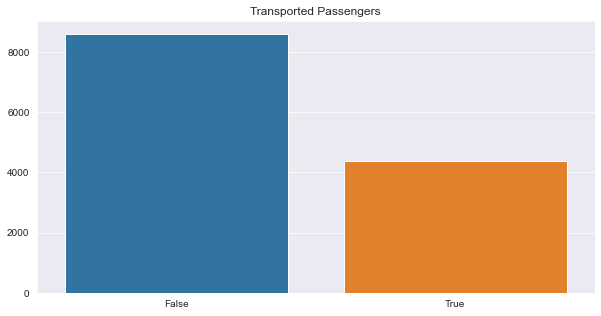

In [7]:
plt.figure(figsize=(10,5))
plt.title('Transported Passengers')
ax = sns.countplot(data=spacetitanic, x='Transported')
ax.set(xlabel = None)
ax.set(ylabel = None)

### Visualizing passengers' home planets and destinations - where did they come from and where were they headed?

[Text(0, 0.5, '')]

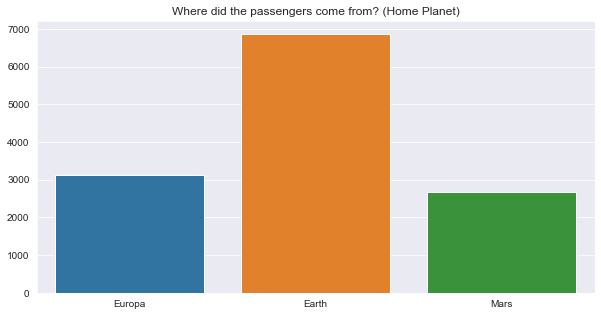

In [8]:
plt.figure(figsize=(10,5))
plt.title('Where did the passengers come from? (Home Planet)')
ax = sns.countplot(data=spacetitanic, x='HomePlanet')
ax.set(xlabel = None)
ax.set(ylabel = None)

Most of the passengers which boarded the spaceship came from Earth. There are roughly about the same amount of passengers that came from Europa and Mars.

[Text(0, 0.5, '')]

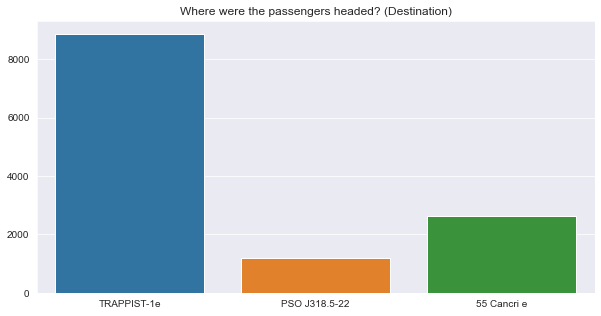

In [10]:
plt.figure(figsize=(10,5))
plt.title('Where were the passengers headed? (Destination)')
ax = sns.countplot(data=spacetitanic, x='Destination')
ax.set(xlabel = None)
ax.set(ylabel = None)

Most of the passengers which boarded the spaceship were headed to the TRAPPIST-1e exoplanet. 

### Visualizing the number of passengers in cryosleep vs. non-cryosleep

In [11]:
spacetitanic['CryoSleep'].value_counts()

False    8079
True     4581
Name: CryoSleep, dtype: int64

In [12]:
CryoMask = spacetitanic['CryoSleep'] == True
InCryo = len(spacetitanic[CryoMask])

NotInCryoMask = spacetitanic['CryoSleep'] == False
NotCryo = len(spacetitanic[NotInCryoMask])

print(f"The difference between Non-Cryo and Cryo is {NotCryo - InCryo} people")

The difference between Non-Cryo and Cryo is 3498 people


[Text(3.200000000000003, 0.5, '')]

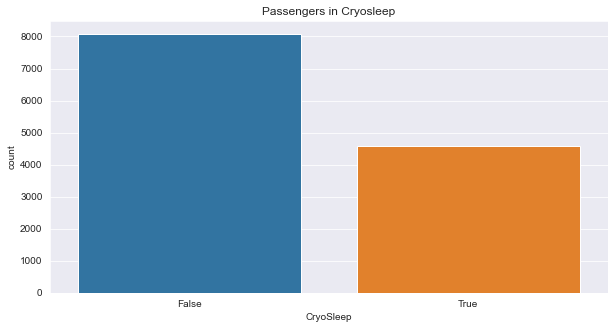

In [13]:
plt.figure(figsize=(10,5))
plt.title('Passengers in Cryosleep')
sns.countplot(data=spacetitanic, x='CryoSleep')
ax.set(xlabel = None)
ax.set(ylabel = None)

There were half as many passengers in wakefulness as there were that were in cryosleep. 

### Visualizing Spending in the Spaceship

As established earlier in the cleaning section of the project, a majority of the passengers spent little to no cash. It is visualized further in the histogram and count plots below:

<AxesSubplot:xlabel='total_spending', ylabel='Count'>

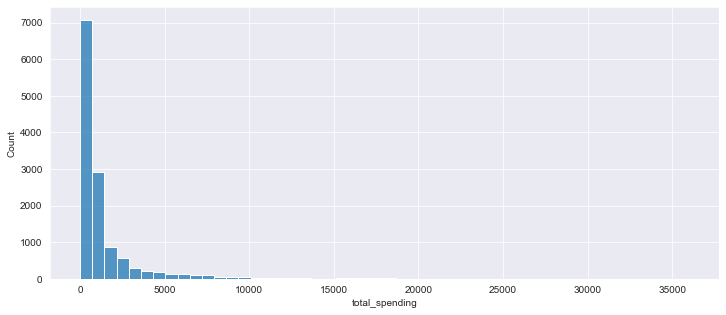

In [34]:
plt.figure(figsize = (12,5))
sns.histplot(data=spacetitanic, x='total_spending', bins=50)

In [14]:
spacetitanic['spending_cat'].value_counts()

zero_spender        6221
moderate_spender    2906
heavy_spender       2902
light_spender        941
Name: spending_cat, dtype: int64

[Text(0, 0.5, '')]

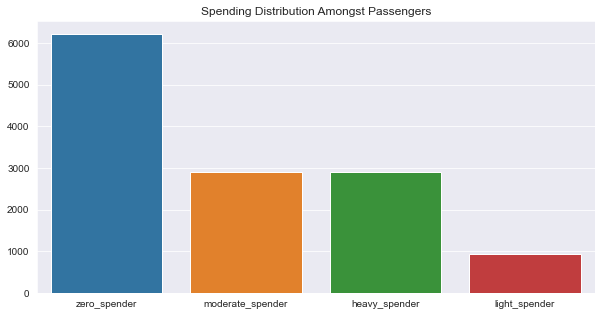

In [15]:
plt.figure(figsize=(10,5))
plt.title('Spending Distribution Amongst Passengers')
ax = sns.countplot(data=spacetitanic, x='spending_cat')
ax.set(xlabel = None)
ax.set(ylabel = None)

There were quite a lot of passengers who did not spend any cash, and there is quite literally the same amount of passengers who were moderate spenders and heavy spenders. The suspicion espoused earlier when cleaning data is that most of the zero spenders were on cryosleep. We will check this assumption:

In [17]:
spacetitanic.groupby('CryoSleep')['total_spending'].agg(['min','max','median','mean'])

,min,max,median,mean
CryoSleep,,,,
False,0.0,35987.0,924.0,2064.355985
True,0.0,0.0,0.0,0.000000


Indeed, everyone who was on cryosleep were zero spenders (Which means when you're in cryosleep, there's no way that you can just wake up out of your own will and do something) However, there were also some passengers who were in wakefulness but did not spend anything.

In [36]:
spacetitanic.columns

Index(['Unnamed: 0', 'PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin',
       'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Name', 'Transported', 'total_spending',
       'spending_cat', 'CryoSleepbool', 'Deck', 'Num', 'Side', 'Group',
       'Group_size', 'Group_cat', 'Age_group'],
      dtype='object')

### Visualizing the Age Distribution

In [37]:
spacetitanic['Age_group'].value_counts()

Adult      7625
Youth      3471
Senior      771
Kid         439
Infant      354
Toddler     310
Name: Age_group, dtype: int64